# CS655: PA 1 Summary

Student: Jida Li

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

def read_data(filename: str, measure_name: str) -> pd.DataFrame:
    # Step 1: Read the data from the txt file
    with open(filename, 'r') as file:
        lines = file.readlines()

    # Step 2: Parse the data to extract CLIENT value and RTT  
    msg_sizes = []
    values = []

    for line in lines:
        if line.startswith("RESULT:"):
            parts = line.split(':')[1].strip().split(',')
            
            msg_size = int(parts[0])  # message size
            value = float(parts[-1])  # rtt/tput value
            
            msg_sizes.append(msg_size)
            values.append(value)

    # Step 3: Create a pandas DataFrame for easier manipulation
    data = pd.DataFrame({
        'MSG_SIZE': msg_sizes,
        measure_name: values
    })  
    return data

def plot_rtt(data: pd.DataFrame, yrange, delay: str):
    plt.plot(data['MSG_SIZE'], data['RTT'], marker='o')

    # Adding labels and a title
    plt.xlabel('Message Size (bytes)')
    plt.ylabel('RTT (s)')
    plt.title(f'Message Size vs Roundtrip Time with {delay}s Delay')
    
    plt.ylim(yrange[0], yrange[1])
    plt.grid(True)

    # Display the plot
    plt.show()

def plot_tput(data: pd.DataFrame, yrange, delay: str):
    plt.plot(data['MSG_SIZE'], data['TPUT'], marker='o')

    # Adding labels and a title
    plt.xlabel('Message Size (bytes)')
    plt.ylabel('TPUT (req/s)')
    plt.title(f'Message Size vs Throughput with {delay}s Delay')
    
    plt.ylim(yrange[0], yrange[1])
    plt.grid(True)

    # Display the plot
    plt.show()
    

### TCP's RTT

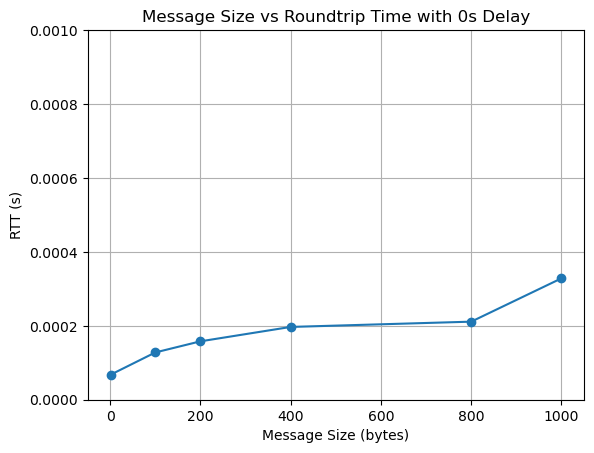

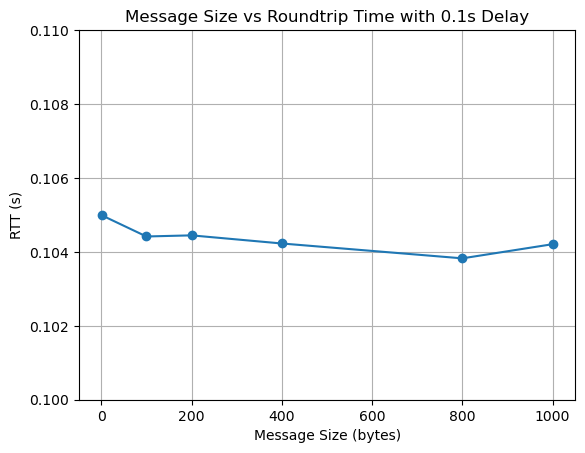

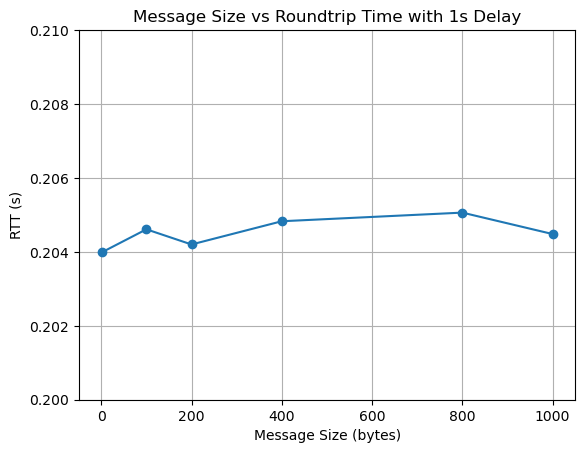

In [21]:
data_0 = read_data('./data/log_client_rtt_0_delay.txt', "RTT")
plot_rtt(data_0, [0, 0.001],'0')

data_500 = read_data('./data/log_client_rtt_100_delay.txt', "RTT")
plot_rtt(data_500, [0.1, 0.11], '0.1')

data_1000 = read_data('./data/log_client_rtt_200_delay.txt', "RTT")
plot_rtt(data_1000, [0.2, 0.21], '1')


### TCP's Throughput

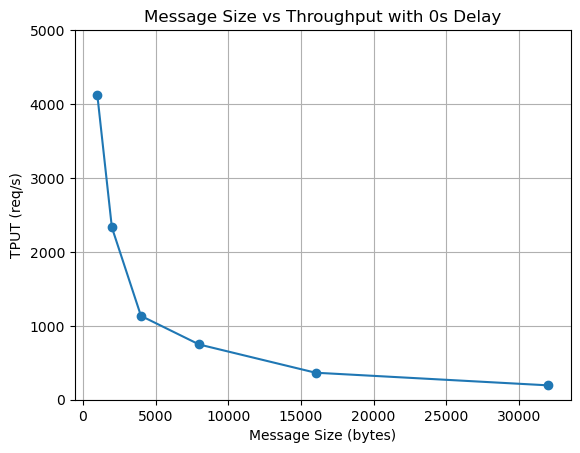

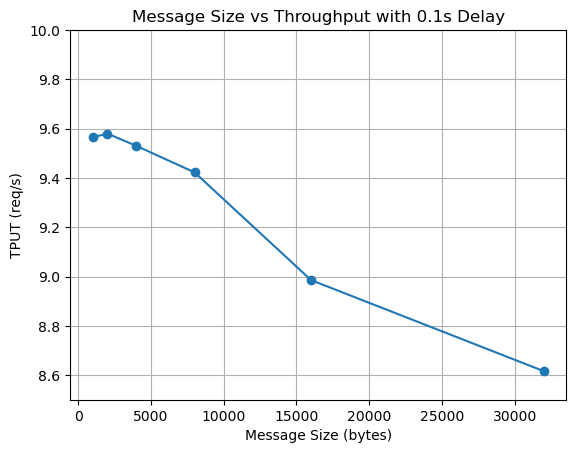

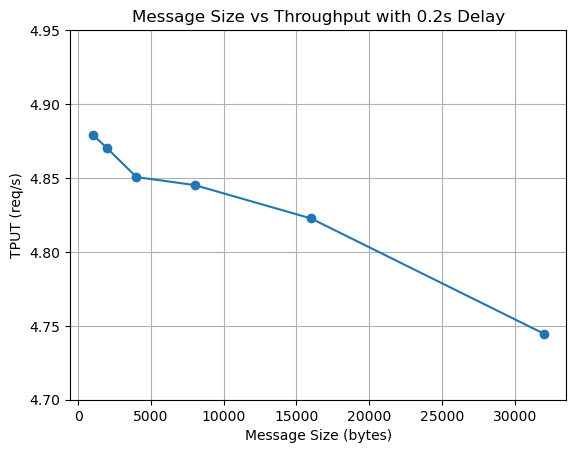

In [22]:
data_0 = read_data('./data/log_client_tput_0_delay.txt', "TPUT")
plot_tput(data_0, [0, 5000],'0')

data_500 = read_data('./data/log_client_tput_100_delay.txt', "TPUT")
plot_tput(data_500, [8.5, 10], '0.1')

data_1000 = read_data('./data/log_client_tput_200_delay.txt', "TPUT")
plot_tput(data_1000, [4.7, 4.95], '0.2')
